In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())
os.chdir('/content/drive/My Drive/1006')
print(os.getcwd())

/content
/content/drive/My Drive/1006


In [ ]:
import pandas as pd
import numpy as np
import random
import taddy
import time

In [ ]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=d7100bbe12de03298a7fb6da99c93083f87369c52876fe26797d2a0a82f521c5
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


importing Jupyter notebook from SelectIndices.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/1006
/content/drive/My Drive/1006
     |████████████████████████████████| 51kB 4.9MB/s 
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-cp37-none-any.whl size=7088 sha256=895219d702b40d70fafa4f5a27c54381c04099a6aefdefa9fdab64316d4b9cba
  Stored in directory: /root/.cache/pip/wheels/bc/fc/2f/c4a16a2578591451fa497f455a1ec95431303421656c76c699
Successfully built fast-pytorch-kmeans
(80, 80)
[21 73 28 23 36 67  7 30 58 66 11 49 26]


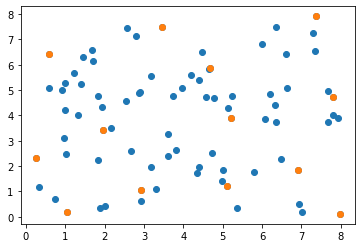

In [ ]:
import import_ipynb
import SelectIndices as si

In [ ]:
dataset_names = ['eo']
embed_types = ['cvec_pca16', 'cvec_nmf16', 'cvec_umap16', 'cvec_tsne16', 'bert', 'roberta', 'distil', 'glove6B', 'universal']
counts = [100, 200, 300, 400, 700, 1000, 1400, 1800, 2400, 3000, 3600, 4200]

## Random pick

In [ ]:
max_obs_eo = len(pd.read_csv('eo_clean_train.csv', index_col=0))
#max_obs_news = len(pd.read_csv('news_clean_train.csv', index_col=0))
#max_obs_twitter = pd.read_csv('twitter_clean_train.csv', index_col=0)
for t in range(4):
  indices_list = []
  for c in counts:
    indices_list.append(si.random_indices(max_obs_eo, c))
  with open('indices_eo_random_'+str(t)+'.txt', 'w') as filehandle:
      filehandle.writelines("%s\n" % idl for idl in indices_list)

"""indices_list = []
for c in counts:
  indices_list.append(si.random_indices(max_obs_news, c))
with open('indices_news_random.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % idl for idl in indices_list)"""

'indices_list = []\nfor c in counts:\n  indices_list.append(si.random_indices(max_obs_news, c))\nwith open(\'indices_news_random.txt\', \'w\') as filehandle:\n    filehandle.writelines("%s\n" % idl for idl in indices_list)'

## K-means Clustering

In [ ]:
for t in range(4):
  for i in range(len(dataset_names)):
    for j in range(len(embed_types)):
      indices_list = []
      data = pd.read_csv(dataset_names[i] + '_' + embed_types[j] + '_train.csv', index_col=0)
      data = data.to_numpy()
      data = si.torch.from_numpy(data).float()
      for c in counts:
        indices_list.append(si.kmeans_indices(data, c))
      with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_kmeans_'+str(t)+'.txt', 'w') as filehandle:
        filehandle.writelines("%s\n" % idl for idl in indices_list)
      print('Completed.')

used 81 iterations (0.6605s) to cluster 8437 items into 100 clusters
used 38 iterations (0.4566s) to cluster 8437 items into 200 clusters
used 38 iterations (0.666s) to cluster 8437 items into 300 clusters
used 38 iterations (0.8672s) to cluster 8437 items into 400 clusters
used 31 iterations (1.2219s) to cluster 8437 items into 700 clusters
used 25 iterations (1.3922s) to cluster 8437 items into 1000 clusters
used 15 iterations (1.1696s) to cluster 8437 items into 1400 clusters
used 11 iterations (1.1138s) to cluster 8437 items into 1800 clusters
used 9 iterations (1.1831s) to cluster 8437 items into 2400 clusters
used 8 iterations (1.3091s) to cluster 8437 items into 3000 clusters
used 5 iterations (0.9868s) to cluster 8437 items into 3600 clusters
used 6 iterations (1.3681s) to cluster 8437 items into 4200 clusters
Completed.
used 49 iterations (0.3184s) to cluster 8437 items into 100 clusters
used 68 iterations (0.763s) to cluster 8437 items into 200 clusters
used 47 iterations (0.

## Greedy farthest points based on KL Divergence

In [ ]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    kld_matrix = np.load(dataset_names[i] + '_kld_' + embed_types[j] + '.npy')
    indices_list = list(si.farthestPointSampler(kld_matrix, 4200))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_kld.txt', 'w') as filehandle:
      filehandle.writelines("%s" % indices_list)
    print('Completed.')

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


## Greedy Farthest points based on Kolmogorov-Smirnov measure

In [ ]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    ks_matrix = np.load(dataset_names[i] + '_ks_' + embed_types[j] + '.npy')
    indices_list = list(si.farthestPointSampler(ks_matrix, 4200))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_ks.txt', 'w') as filehandle:
      filehandle.writelines("%s" % indices_list)
    print('Completed.')

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


## Greedy Farthest points based on Cosine Distance

In [ ]:
for i in range(len(dataset_names)):
  for j in range(len(embed_types)):
    cos_matrix = np.load(dataset_names[i] + '_cos_' + embed_types[j] + '.npy')
    indices_list = list(si.farthestPointSampler(cos_matrix, 4200))
    with open('indices_'+dataset_names[i]+'_'+embed_types[j]+'_cos.txt', 'w') as filehandle:
      filehandle.writelines("%s" % indices_list)
    print('Completed.')

Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.
Completed.


## Topics and Taddy

In [ ]:
for t in range(4):
  indices_list = []
  for count in counts:
    topicmat = pd.read_csv('new_topics12.csv')
    topicmat.drop(columns=topicmat.columns[0], inplace=True)
    indices_list.append(taddy.dopt(topicmat.values, count))
  with open("indices_eo_topics_taddy_"+str(t)+".txt", "w") as output:
    output.write(str(indices_list))

In [ ]:
for t in range(0, 4):
  for embed in embed_types:
    indices_list = []
    for count in counts:
      topicmat = pd.read_csv('eo_'+embed+'_train'+'.csv')
      topicmat.drop(columns=topicmat.columns[0], inplace=True)
      indices_list.append(taddy.dopt(topicmat.values, count))
    with open("indices_eo_" + embed + "_taddy_"+str(t)+".txt", "w") as output:
      output.write(str(indices_list))
    print(t, embed)